#Introduction
We will explore a dataset in regards to income and career choice using visualization tools from Python

##Data description
The dataset is of students finishing college between 2010 and 2012. The data is collected by American Community Survey and has been provided courtesy of FiveThirtyEight.
There are 173 data points with 21 columns listed as below:
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

##Purpose
Using visualizations, we can start to explore questions from the dataset such as:
- Do students in more popular majors make more money?
- Do students in more popular majors find it easier to get employed?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

In [6]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')

In [7]:
# Overview
print(recent_grads.shape)
print(recent_grads.iloc[0])
print(recent_grads.head(4))

(173, 21)
Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
 

In [8]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

We observe one row missing data in our dataset. Let's drop them to prevent matplotlib from thowing errors.

In [9]:
# Drop row with missing values
cleaned_data = recent_grads.dropna()

##Answer to our questions
###Do students in more popular majors make more money?

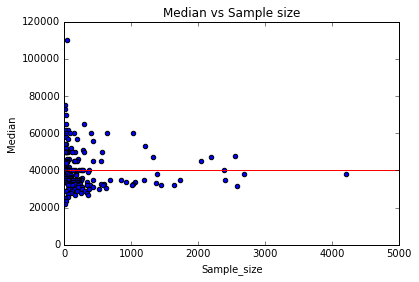

In [12]:
cleaned_data.plot(x='Sample_size', y='Median', title='Median vs Sample size', kind='scatter', xlim=(0, 5000))
plt.axhline(cleaned_data['Median'].mean(), color='Red')

We can conclude that students with more popular majors do not make more money on average.

###Do students in more popular majors find it easier to get employed?

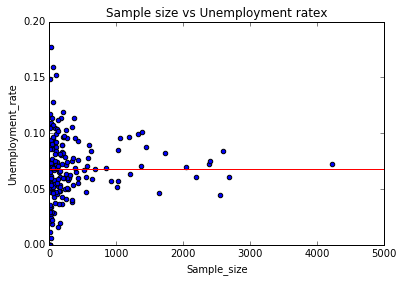

In [13]:
cleaned_data.plot(x='Sample_size', y='Unemployment_rate', title='Sample size vs Unemployment ratex', kind='scatter', xlim=(0, 5000), ylim=(0,0.2))
plt.axhline(cleaned_data['Unemployment_rate'].mean(), color='Red')

Oops. Following the majority does not earn you an easy pass for employment either

###Do students that majored in subjects that were majority female make more money?

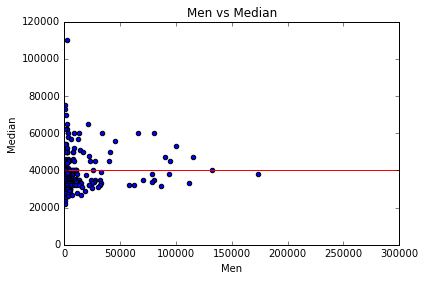

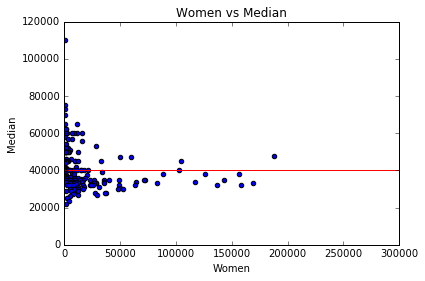

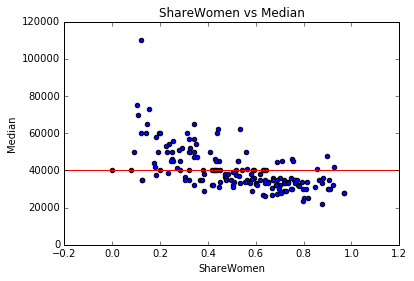

In [23]:
cleaned_data.plot(x='Men', y='Median', title='Men vs Median', kind='scatter', xlim=(0,300000))
plt.axhline(cleaned_data['Median'].mean(), color='Red')
cleaned_data.plot(x='Women', y='Median', title='Women vs Median', kind='scatter', xlim=(0,300000))
plt.axhline(cleaned_data['Median'].mean(), color='Red')
cleaned_data.plot(x='ShareWomen', y='Median', title='ShareWomen vs Median', kind='scatter')
plt.axhline(cleaned_data['Median'].mean(), color='Red')

The glass ceiling is pretty clear. Majors dominated by women have income lower compared to those occupied by men. Even the covariance between ShareWomen and Median tells the same story.

###Is there any link between the number of full-time employees and median salary?

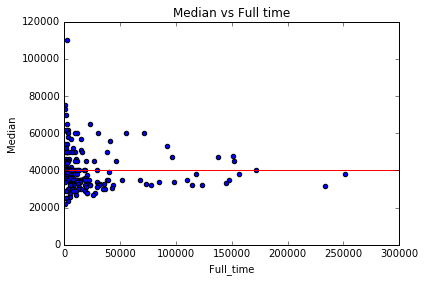

In [18]:
cleaned_data.plot(x='Full_time', y='Median', title='Median vs Full time', kind='scatter', xlim=(0,300000))
plt.axhline(cleaned_data['Median'].mean(), color='Red')

There is not a clear link between full-time workers and median salary.

###What percent of majors are predominantly male? Predominantly female?

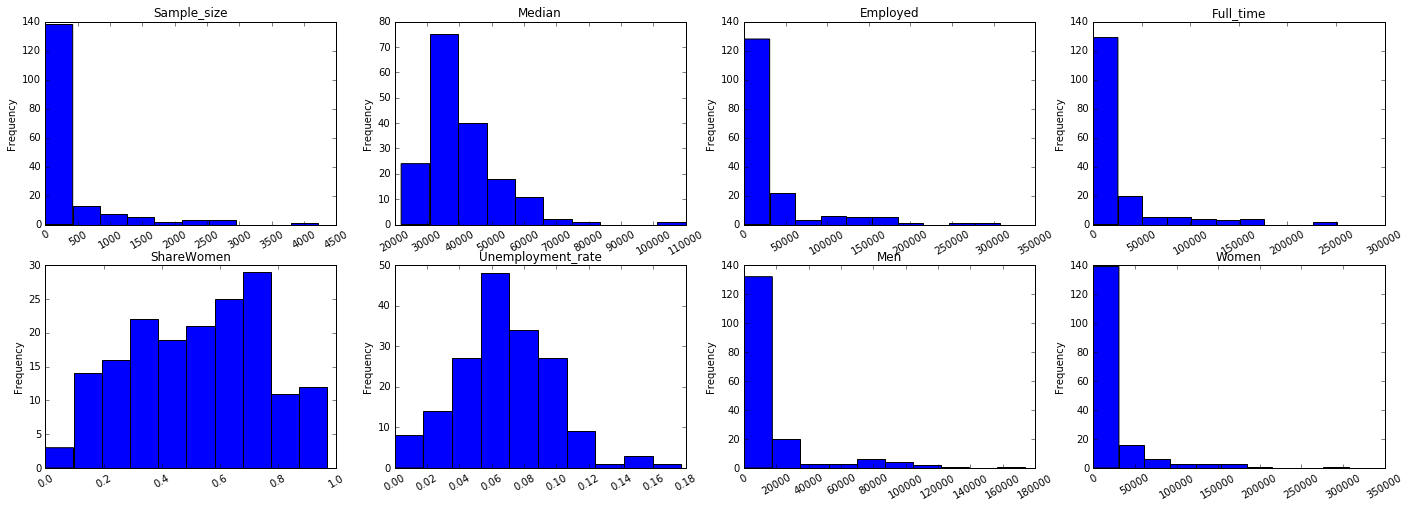

In [6]:
cols = ['Sample_size','Median','Employed','Full_time','ShareWomen','Unemployment_rate','Men','Women']
fig = plt.figure(figsize=(24,8))
for i in range(0,8):
    ax=fig.add_subplot(2,4,i+1)
    ax=cleaned_data[cols[i]].plot(kind='hist', title=cols[i], rot=30)
    

There are about 44,8% majors with mainly female and 43% majors predominantly mae.

###What's the most common median salary range?

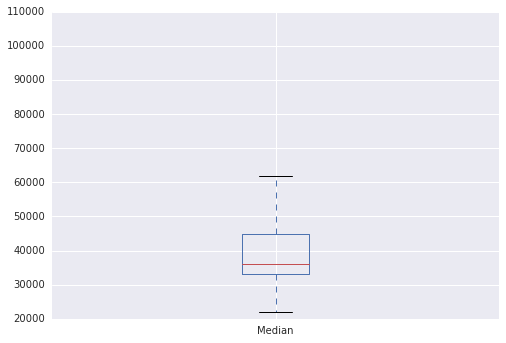

In [40]:
cleaned_data['Median'].plot.box()

The common range for median is from 33000 to 46000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67276f8e80>,
      dtype=object)

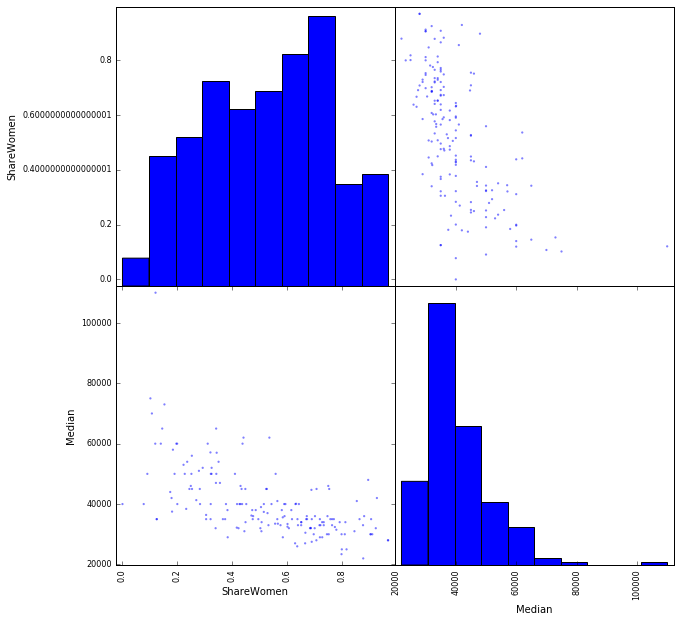

In [28]:
#Discovering covariaance using scatter matrix
from pandas.plotting import scatter_matrix 
scatter_matrix(cleaned_data[['ShareWomen', 'Median']], figsize=(10,10))

This confirms our argument earlier regarding women percentage and income.

###ShareWomen in top and bottom level jobs

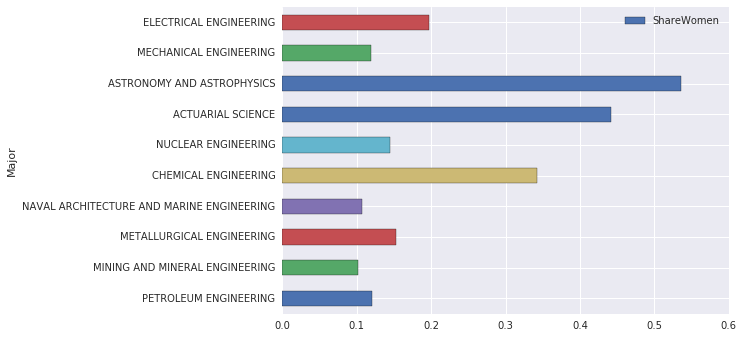

In [34]:
cleaned_data[:10].plot.barh(x='Major', y='ShareWomen')

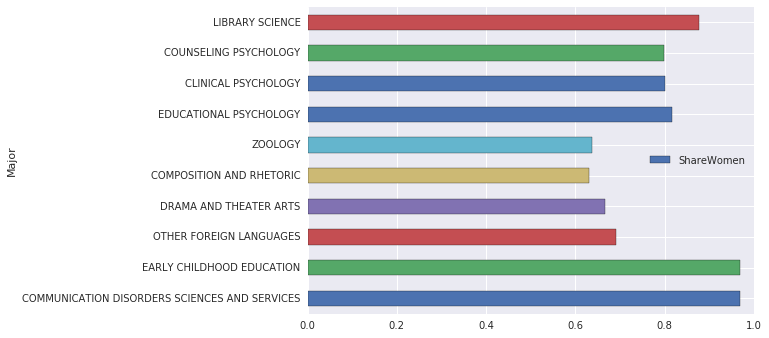

In [35]:
cleaned_data[-10:].plot.barh(x='Major', y='ShareWomen')

There are a majority of women working at bottom jobs compared to top-notch ones.

In [ ]:
###Unemployment rate in top and bottom level jobs

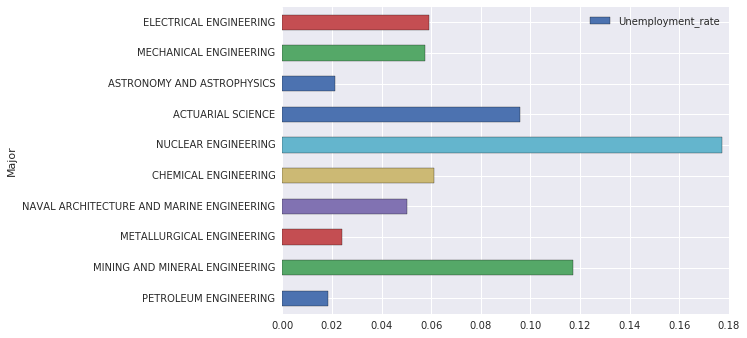

In [36]:
cleaned_data[:10].plot(x='Major', y='Unemployment_rate',kind='barh')

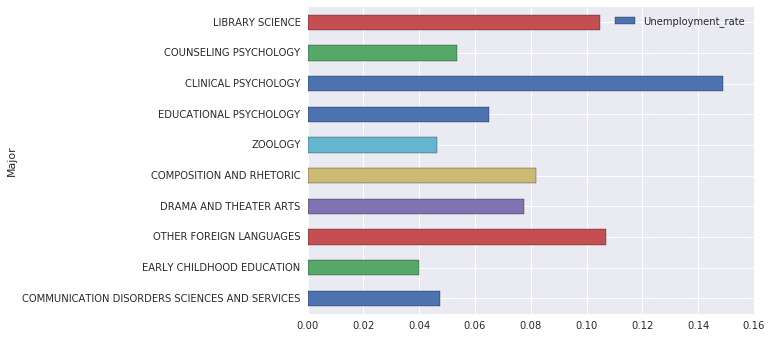

In [38]:
cleaned_data[-10:].plot(x='Major',y='Unemployment_rate',kind='barh')

###Using grouped bar plot to compare the number of men with the number of women in each category of majors

([<matplotlib.axis.XTick at 0x7f671d478c18>,
 <a list of 16 Text xticklabel objects>)

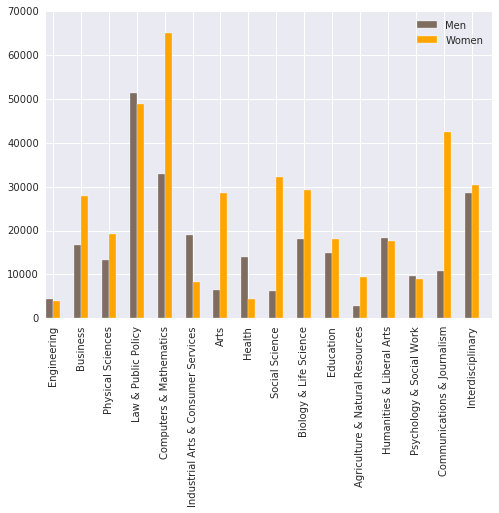

In [39]:
majors = cleaned_data['Major_category'].unique()
df = pd.DataFrame({"Majors": cleaned_data['Major_category'], "Men": cleaned_data['Men'], "Women": cleaned_data['Women']})
major_men = {}
major_women = {}
for i in majors:
    men = df.loc[df['Majors'] == i,'Men']
    women = df.loc[df['Majors'] == i,'Women']
    mean_men = men.mean()
    mean_women = women.mean()
    major_men[i] = round(mean_men)
    major_women[i] = round(mean_women)

men = pd.Series(major_men)
women = pd.Series(major_women)
db = pd.DataFrame(men, columns = ['Men'])
db['Women'] = women

barWidth = 0.25
 
# set height of bar
bars1 = db['Men']
bars2 = db['Women']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Men')
plt.bar(r2, bars2, color='#FFA500', width=barWidth, edgecolor='white', label='Women')
plt.legend()
plt.xticks([r + barWidth for r in range(len(bars1))], majors, rotation=90)



Males dominates in 6/16 majors while females dominates the rest.

###Distribution of unemployment rate

In [41]:
cleaned_data['Unemployment_rate '].box.plot()

NameError: name 'clean_data' is not defined